In [1]:
from graphviz import Source
from IPython.display import Image
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝


# Step 25

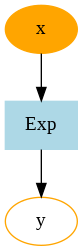

In [ ]:
graph = """
digraph g {
1 [label="x", color=orange, style=filled]
2 [label="y", color=orange]
3 [label="Exp", color=lightblue, style=filled, shape=box]
1 -> 3
3 -> 2
}
"""

make_graph(graph)

# Step 26

visualization/goldstein


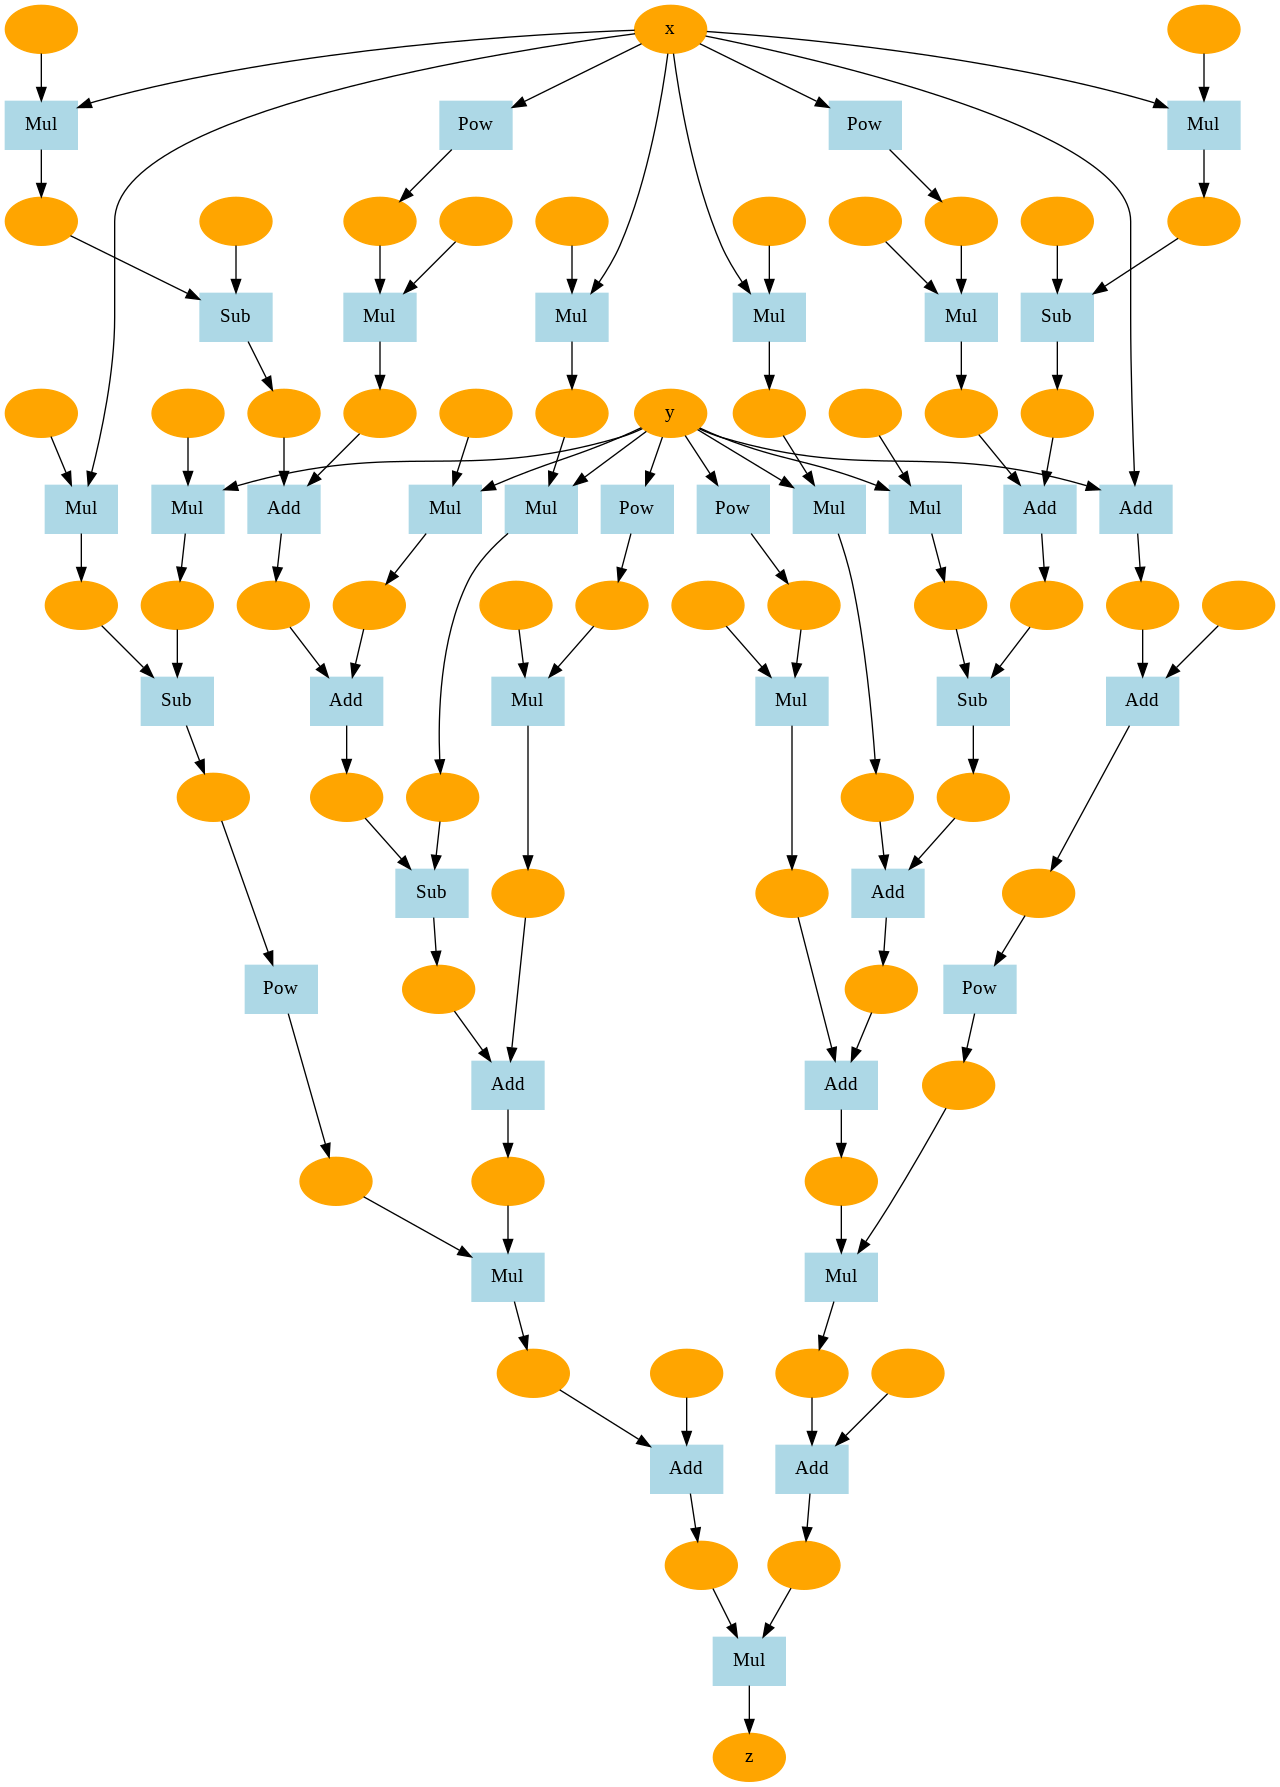

In [ ]:
from dezero import Variable as v
from dezero.utils import plot_dot_graph
import numpy as np


def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x +12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

x = v(np.array(1.0))
y = v(np.array(1.0))
z = goldstein(x,y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, filename='goldstein')

# Step 27

In [2]:
import numpy as np
from dezero import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y
    
    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx

def sin(x):
    return Sin()(x)

In [3]:
from dezero import Variable

x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071067811865475
0.7071067811865476


테일러 급수 (a = 0 인 매클로린 전개)

In [6]:
import math

def my_sin(x, threshold=1e-4):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y

0.7071064695751781
0.7071032148228457


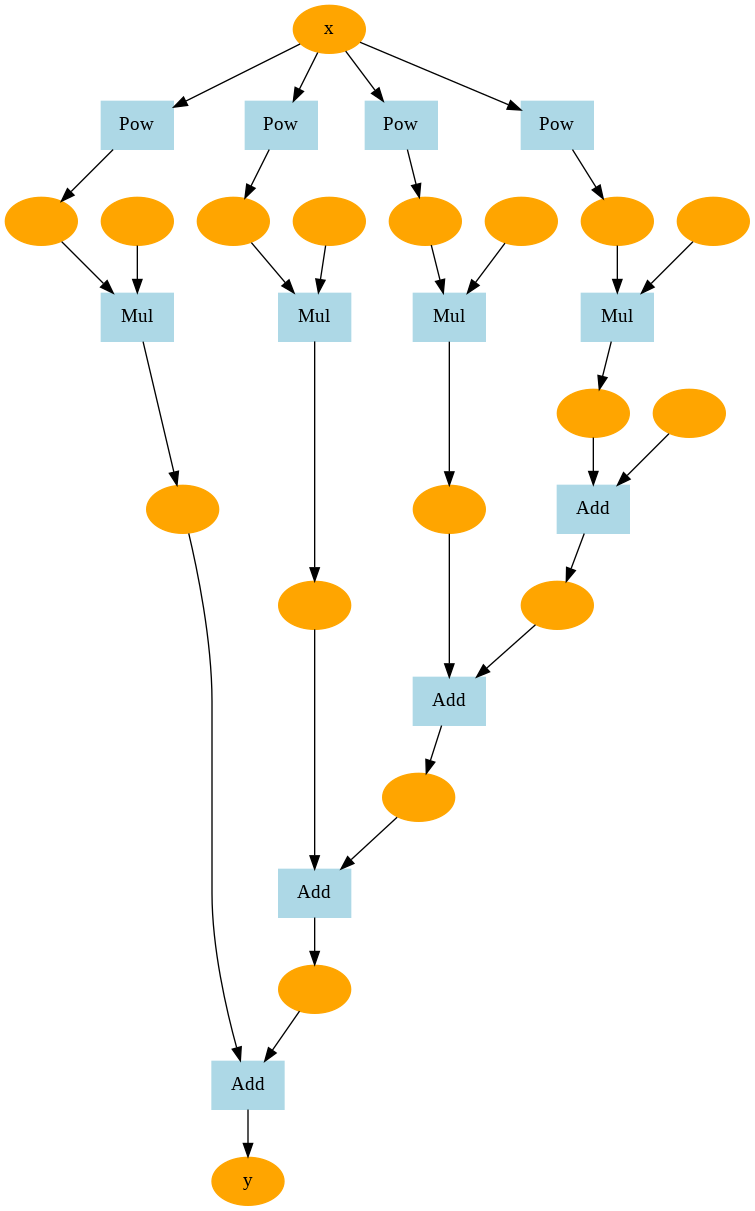

In [8]:
from dezero import Variable as v
from dezero.utils import plot_dot_graph

x = v(np.array(np.pi/4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, filename='my_sin')

In [9]:
x = v(np.array(np.pi/4))
y = my_sin(x, 1e-150)
y.backward()

print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, filename='my_sin')

0.7071067811865475
0.7071067811865475


# Step 28 - Function Optimization

최적화란 어떤 함수가 주어졌을 때 그 최솟값(또는 최댓값)을 반환하는 입력(함수의 인수)을 찾는 일.

In [10]:
import numpy as np
from dezero import Variable as v

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (1 - x0) ** 2
    return y

In [11]:
x0 = v(np.array(0.0))
x1 = v(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

-2.0 400.0


경사 하강법

In [14]:
x0 = v(np.array(0.0))
x1 = v(np.array(2.0))

lr = 0.001
iters = 1000

for i in range(iters):
    if i % 100 == 0:
        print(x0, x1)

    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    # 최솟값을 찾는 문제이므로, 기울기 방향에 마이너스를 곱함
    # 기울기의 음의 방향으로 lr만큼 이동
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

print(x0, x1)

variable(0.0) variable(2.0)
variable(0.23453003962998273) variable(0.05207827378949265)
variable(0.3409734515561922) variable(0.11318851180845607)
variable(0.41919753006532934) variable(0.17285823713259696)
variable(0.47983398142137307) variable(0.22763450592049675)
variable(0.528790406396114) variable(0.27726094730773554)
variable(0.5695146002534035) variable(0.32220780806470606)
variable(0.6041543762636158) variable(0.3630543722708903)
variable(0.6341265886616599) variable(0.4003345105719195)
variable(0.6604110247616388) variable(0.4345058682467541)
variable(0.6837118569138317) variable(0.4659526837427042)


# Step 29 - Function Optimization 2

In [17]:
import numpy as np
from dezero import Variable as v

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

def gx2(x):
    return 12 * x ** 2 - 4

x = v(np.array(2.0))
iters = 10

for i in range(iters):
    print(i, x)

    y = f(x)
    x.cleargrad()
    y.backward()

    x.data -= x.grad / gx2(x.data)

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)
